# Algorithm1 - Just Plots - 10 Node BAG


In [ ]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import asarray
from numpy import savetxt
from numpy.lib.arraypad import pad

In [ ]:
global mode_labels, mode_colors
mode_labels = ['Proposed Fixed Resource Monitoring', 'Proposed Adaptive Resource Monitoring', 'Random Monitoring' , 'Fixed Nodes Monitoring', 'All Nodes Monitoring (Baseline)']
mode_colors = ['#0000FF', '#FF0000', '#4C9A2A' , '#7D451A', '#000000']
modes = ['all', 'threshold', 'ours', 'random_fixed', 'fixed']
T = 10; m = 10; N = 10; max_num = 100

In [ ]:
def mode_handler(mode, ind=None):
  global fixed, ours, random, alll, random_fixed, threshold, mode_labels, mode_colors
  handler = None
  if ind is not None:
    if mode == 'fixed':
      handler = fixed[ind]
    elif mode == 'ours':
      handler = ours[ind]
    elif mode == 'random':
      handler = random[ind]
    elif mode == 'all':
      handler = alll[ind]
    elif mode == 'random_fixed':
      handler = random_fixed[ind]
    elif mode == 'threshold':
      handler = threshold[ind]
  if mode == 'fixed':
    label = mode_labels[3]
    color = mode_colors[3]
  elif mode == 'ours':
    label = mode_labels[0]
    color = mode_colors[0]
  elif mode == 'random':
    label = mode_labels[5]
    color = mode_colors[5]
  elif mode == 'all':
    label = mode_labels[4]
    color = mode_colors[4]
  elif mode == 'random_fixed':
    label = mode_labels[2]
    color = mode_colors[2]
  elif mode == 'threshold':
    label = mode_labels[1]
    color = mode_colors[1]
  return handler, label, color

## Plots for $q=0.2$

In [ ]:
packed_for_m = np.load('packed_for_m'+str(m)+'q'+str(0.2)+'.npy', allow_pickle=True)

### Avg Accuracy + Avg Error

<ipython-input-83-e493729987b0>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(X+1)
<ipython-input-83-e493729987b0>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(X+1)


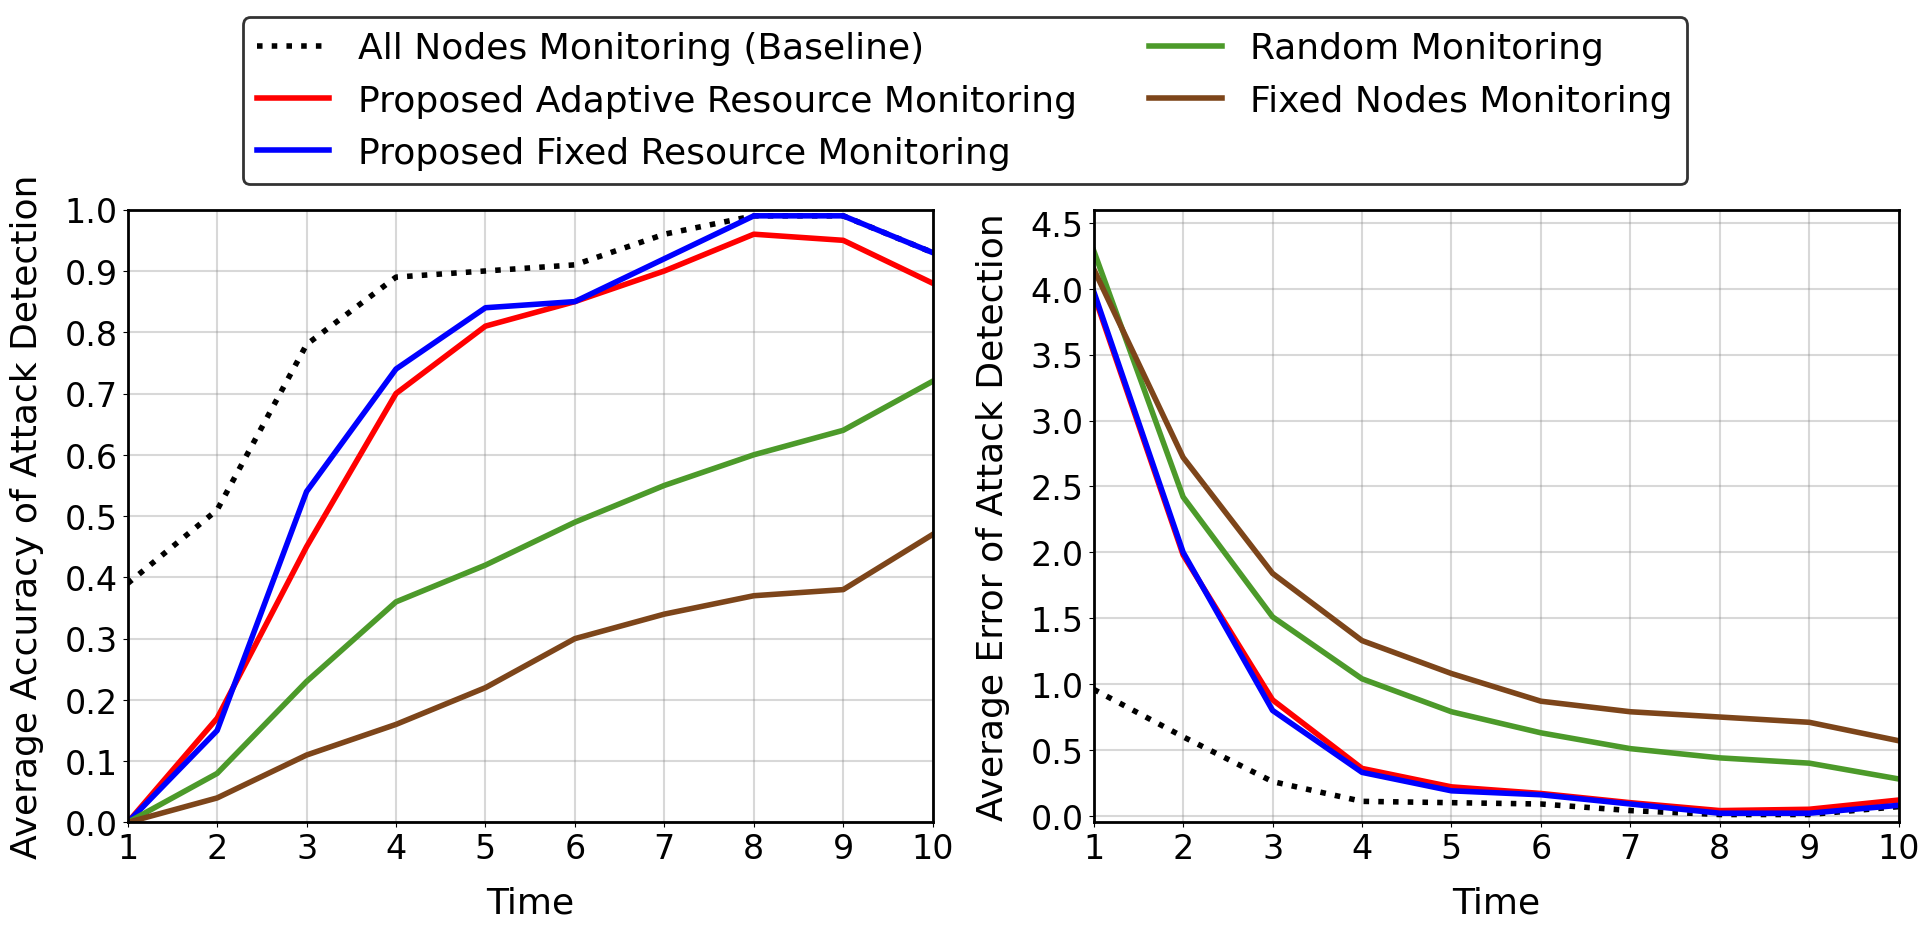

In [ ]:
plt.rcdefaults()
fig, axis = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

fontsize = 26
m_num = 0

for pack in packed_for_m:
  m_num += 1
  if m_num != 2:
     continue

  for mode in modes:
    (fixed, ours, random, alll, random_fixed, threshold) = pack

    # print(fixed)
    all_tot_err_list, mode_label, mode_color= mode_handler(mode, 2)
    all_acc_list, mode_label, mode_color = mode_handler(mode, 3)
    mean_acc_list = np.zeros(T)
    mean_tot_err_list = np.zeros(T)
    for num in range(0, max_num):
      mean_tot_err_list += all_tot_err_list[num]
      mean_acc_list += all_acc_list[num]
    mean_acc_list/= max_num
    mean_tot_err_list/= max_num
    X = np.arange(0, T)
    # plot
    linestyle = '-'
    if mode == 'all':
      linestyle='dotted'
    axis[1].plot(X, mean_tot_err_list, linewidth=4, label=mode_label, color=mode_color, linestyle=linestyle)
    axis[0].plot(X, mean_acc_list, linewidth=4, label=mode_label, color=mode_color, linestyle=linestyle)

  axis[1].set_xticklabels(X+1)
  axis[1].set_xlim([0,T-1])
  axis[1].set_ylim([-0.05, 4.6])
  axis[1].set_xticks(ticks=X)
  axis[1].set_ylabel(r'Average Error of Attack Detection', fontsize=fontsize, labelpad=15)
  axis[1].set_xlabel(r'Time', fontsize=fontsize, labelpad=15)
  axis[1].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
  axis[1].set_yticks(np.arange(0,4.6,0.5))

  yticks = np.arange(11)/10
  axis[0].set_xticklabels(X+1)
  axis[0].set_xticks(ticks=X)
  axis[0].set_ylabel(r'Average Accuracy of Attack Detection', fontsize=fontsize, labelpad=15)
  axis[0].set_xlabel(r'Time', fontsize=fontsize, labelpad=15)
  axis[0].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
#   axis[0].legend(loc='best',prop={'size': fontsize-2} )
  axis[0].set_xlim([0,T-1])
  axis[0].set_ylim([0.05,1])
  axis[0].set_yticks(ticks=yticks)

[x.set_linewidth(2) for x in axis[0].spines.values()]
[x.set_linewidth(2) for x in axis[1].spines.values()]
############
# fig.text(0.5, 0.04, 'Number of Reimaged Nodes per Step', ha='center', fontsize=fontsize+1)
plt.setp(axis[0].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[0].get_yticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_yticklabels(), fontsize=fontsize-2)

fig.set_size_inches(23, 9.5)
handles, labels = axis[0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.77
                    , wspace=0.2, hspace=0.05)
plt.show()

### Total accuracy + Together (m= 1, 4, 9)

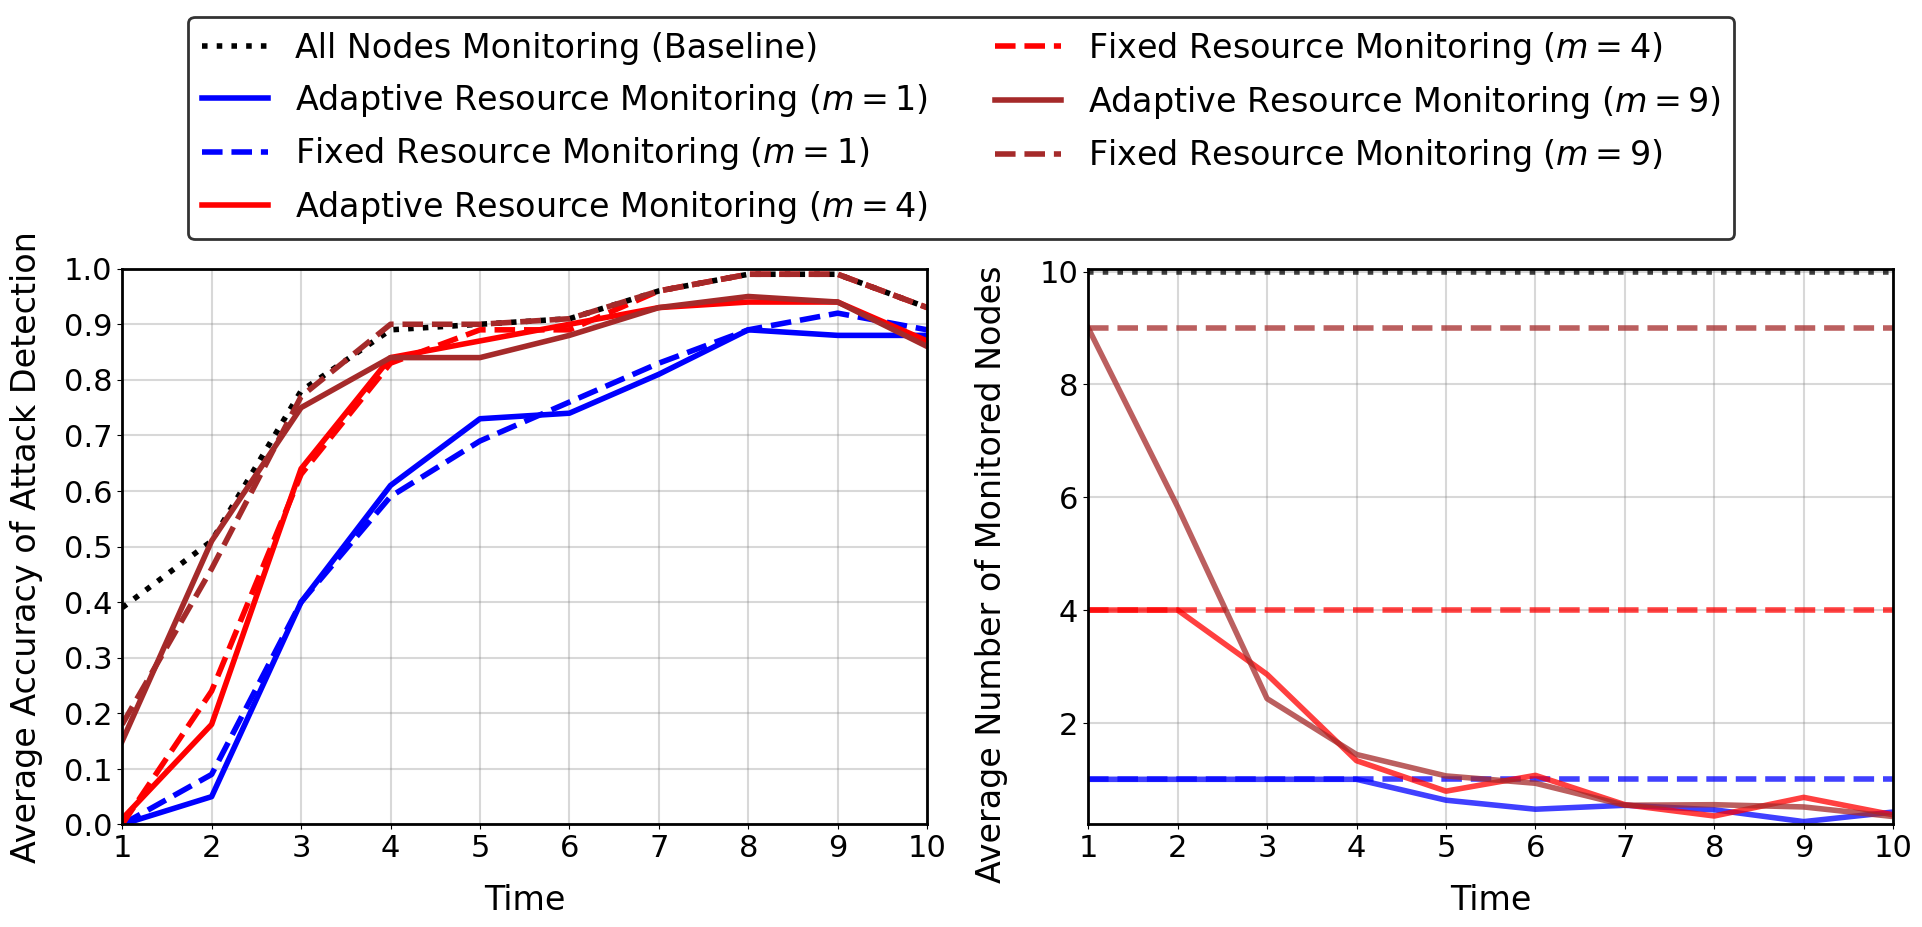

In [ ]:
# fontsize = 22
modes_color = ["#0000FF" , "#FF0000", "#A52A2A"]
m_bypass = 0
m_h = 0

fig, axis = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fontsize = 24

one_time = False
for pack in packed_for_m:
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  m_bypass += 1
  if (m_bypass != 1) and (m_bypass != 4) and (m_bypass != 9):
    continue
  m_h += 1
  for mode in modes:
    if (mode!="threshold" and mode!="ours" and mode!="all") or (mode=="all" and one_time): continue;
    all_acc_list, mode_label, mode_color = mode_handler(mode, 3)
    mean_acc_list = np.zeros(T)
    for num in range(0, max_num):
      mean_acc_list += all_acc_list[num]
    mean_acc_list/= max_num
    X = np.arange(0, T)
    linestyle = '-'
    if mode == 'all':
      linestyle='dotted'
      one_time = True
      mode_label = "All Nodes Monitoring (Baseline)"
      mode_color = "#000000"
    elif mode == 'threshold':
      mode_color = modes_color[m_h-1]
      mode_label = 'Adaptive Resource Monitoring ($m=$'+str(m_bypass) + ")"
    elif mode == 'ours':
      mode_color = modes_color[m_h-1]
      mode_label = 'Fixed Resource Monitoring ($m=$'+str(m_bypass) + ")"
      linestyle='dashed'
    axis[0].plot(X, mean_acc_list, linewidth=4, label=mode_label, color=mode_color, linestyle=linestyle)

yticks = np.arange(11)/10
axis[0].set_xticks(X)
axis[0].set_xticklabels(X+1)
axis[0].set_ylabel(r'Average Accuracy of Attack Detection', fontsize=fontsize, labelpad=15)
axis[0].set_xlabel(r'Time', fontsize=fontsize, labelpad=15)
axis[0].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
# pl[0]t.legend(loc='best',prop={'size': fontsize-2} )
axis[0].set_xlim([0,T-1])
axis[0].set_ylim([0.05,1])
axis[0].set_yticks(yticks)


m_bypass = 0
m_h = 0

for pack in packed_for_m:
  m_bypass += 1
  if (m_bypass != 1) and (m_bypass != 4) and (m_bypass != 9):
    continue
  m_h += 1
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  all_mon_list_threshold = threshold[4]

  occurance_threshold = np.zeros(T)
  i =0
  # for i in range(0, T):
  for arr in all_mon_list_threshold:
    i = 0
    for arr2 in arr:
      occurance_threshold[i] += len(arr2)
      # print(len(arr2))
      i += 1

  width = 2.5  # the width of the bars
  # mean_mon_list_threshold = occurance_threshold
  # mean_mon_list_ours = occurance_ours
  mean_mon_list_threshold = occurance_threshold/max_num
  label = 'Adaptive Resource Monitoring ($m=$'+str(m_bypass) + ")"
  axis[1].plot(np.arange(N), mean_mon_list_threshold, linewidth=4, label=label,color=m_mode_colors[m_h-1], alpha=0.75)
  label = 'Fixed Resource Monitoring ($m=$'+str(m_bypass) + ")"
  axis[1].plot(np.arange(N), np.arange(N)*0 + m_bypass, linewidth=4, label=label,color=m_mode_colors[m_h-1], alpha=0.75, linestyle = "dashed" )

axis[1].plot(np.arange(N), np.arange(N)*0 + 10, linewidth=4, label="All Nodes Monitoring (Baseline)",color=mode_colors[4], alpha=0.75, linestyle = "dotted" )
axis[1].set_xticks(np.arange(N))
axis[1].set_xticklabels(np.arange(N)+1, fontsize=fontsize-1)
axis[1].set_ylabel(r'Average Number of Monitored Nodes', fontsize=fontsize
                   , labelpad=15)
axis[1].set_xlabel(r'Time', fontsize=fontsize, labelpad=15)
# axis[1].set_nd(bbox_to_anchor=(-1.4, 0.1, 2,2), loc='upper center', mode="expand", ncol= 2, prop={'size': fontsize-2})
axis[1].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
axis[1].set_xlim([0,T-1])
axis[1].set_ylim([0.2,N+0.05])



[x.set_linewidth(2) for x in axis[0].spines.values()]
[x.set_linewidth(2) for x in axis[1].spines.values()]
############
# fig.text(0.5, 0.04, 'Number of Reimaged Nodes per Step', ha='center', fontsize=fontsize+1)
plt.setp(axis[0].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[0].get_yticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_yticklabels(), fontsize=fontsize-2)
axis[1].yaxis.set_label_coords(-0.1,0.45)

fig.set_size_inches(23, 9.5)
handles, labels = axis[0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.71
                    , wspace=0.2, hspace=0.05)
# plt.show()

plt.show()

In [ ]:
plt.rcdefaults()
fig, axis = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

fontsize = 24
m_num = 0

mean_of_mean = np.zeros(m)
l = len(modes)/2
j=0
for mode in modes:
  mean_of_mean = np.zeros(len(q_list))
  i=0
  for pack in packed_for_q_list:
    i += 1
    (fixed, ours, random, alll, random_fixed, threshold) = pack
    all_tot_err_list, mode_label, mode_color= mode_handler(mode, 2)
    mean_tot_err_list = np.zeros(T)
    for num in range(0, max_num):
      mean_tot_err_list += all_tot_err_list[num]
    mean_of_mean[i-1] = np.sum(mean_tot_err_list)/(max_num)

    j += 1

  linestyle = "solid"
  if mode=='all':
    linestyle = "dotted"
  rects2 = axis[0].plot(np.array(q_list) , mean_of_mean, linewidth = 4 ,label=mode_label,color=mode_color, alpha=0.75, linestyle =linestyle)


axis[0].set_xticks(np.array(q_list))
axis[0].yaxis.set_tick_params(labelsize=fontsize-1)
axis[0].set_xticklabels(np.array(q_list), fontsize=fontsize-1)
axis[0].set_ylabel(r' Average Total Error', fontsize=fontsize, labelpad=15)
axis[0].set_xlabel(r'Measurement Noise (q)', fontsize=fontsize, labelpad=15)
axis[0].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)



l = (len(modes)-1)/2
j=0
# Have for diffferent qs.


i=0
num1 = np.zeros(len(q_list))
num2 = np.zeros(len(q_list))
for pack in packed_for_q_list:
  j = 0
  i += 1
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  all_mon_list, mode_label, mode_color= mode_handler('ours', 4)
  for arr in all_mon_list:
    for arr2 in arr:
      num1[i-1] += len(arr2)
  all_mon_list, mode_label, mode_color= mode_handler('threshold', 4)
  for arr in all_mon_list:
    for arr2 in arr:
      num2[i-1] += len(arr2)

num1 = num1/(max_num)
num2 = num2/(max_num)
width = 43  # the width of the bars
q_list = np.array(q_list)
print(q_list)
all_mon_list, mode_label, mode_color= mode_handler('ours', 4)
rects2 = ax1.plot(q_list, num1 ,linewidth=4, label=mode_label,color=mode_color, alpha=0.75)
all_mon_list, mode_label, mode_color= mode_handler('threshold', 4)
rects2 = axis[1].plot(q_list, num2 ,linewidth=4,label=mode_label,color=mode_color, alpha=0.75)

axis[1].set_xticks(q_list)
axis[1].yaxis.set_tick_params(labelsize=fontsize-1)
axis[1].set_xticklabels(q_list, fontsize=fontsize-1)
axis[1].set_ylabel(r' Average Total Number of Monitored Nodes', fontsize=fontsize, labelpad=15)
axis[1].set_xlabel(r'Measurement Noise (q)', fontsize=fontsize, labelpad=15)
axis[1].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
axis[1].set_ylim([4, 21])




[x.set_linewidth(2) for x in axis[0].spines.values()]
[x.set_linewidth(2) for x in axis[1].spines.values()]
############
# fig.text(0.5, 0.04, 'Number of Reimaged Nodes per Step', ha='center', fontsize=fontsize+1)
plt.setp(axis[0].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[0].get_yticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_yticklabels(), fontsize=fontsize-2)
axis[1].yaxis.set_label_coords(-0.1,0.45)

fig.set_size_inches(23, 9.5)
handles, labels = axis[0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.77
                    , wspace=0.2, hspace=0.05)
plt.show()

NameError: ignored

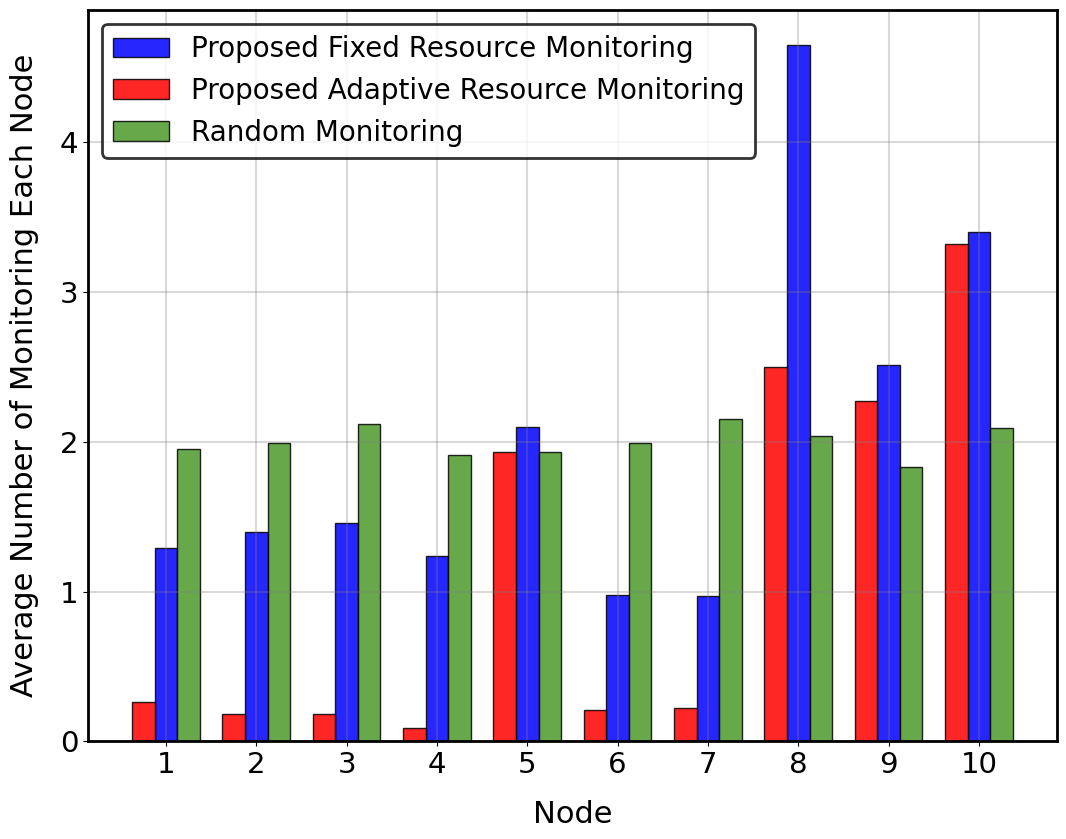

In [ ]:
plt.rcdefaults()
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False)
fontsize = 22
mm = 0
for pack in packed_for_m:
  mm += 1
  if mm != 2:
        continue
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  all_mon_list_threshold = threshold[4]
  all_mon_list_ours = ours[4]
  all_mon_list_random_fixed = random_fixed[4]
  occurance_threshold = np.zeros(N)
  occurance_ours = np.zeros(N)
  occurance_random_fixed = np.zeros(N)

  for i in range(0, N):
    for arr in all_mon_list_threshold:
      for arr2 in arr:
        occurance_threshold[i] += np.sum(arr2 == i)
  for i in range(0, N):
    for arr in all_mon_list_ours:
      for arr2 in arr:
          occurance_ours[i] += np.sum(arr2 == i)
  for i in range(0, N):
    for arr in all_mon_list_random_fixed:
        for arr2 in arr:
          occurance_random_fixed[i] += np.sum(arr2 == i)

  width = 0.25  # the width of the bars
  # mean_mon_list_threshold = occurance_threshold
  # mean_mon_list_ours = occurance_ours
  mean_mon_list_threshold = occurance_threshold/max_num
  mean_mon_list_ours = occurance_ours/max_num
  mean_mon_list_random_fixed =occurance_random_fixed/max_num
  rects2 = ax1.bar(np.arange(N), mean_mon_list_ours, width ,label=mode_labels[0],color=mode_colors[0], alpha=0.85, edgecolor="black")
  rects1 = ax1.bar(np.arange(N)-width, mean_mon_list_threshold, width, label=mode_labels[1],color=mode_colors[1], alpha=0.85,edgecolor="black" )
  rects3 = ax1.bar(np.arange(N)+width, mean_mon_list_random_fixed, width, label=mode_labels[2],color=mode_colors[2], alpha=0.85,edgecolor="black" )

  ax1.set_xticks(np.arange(N))
  ax1.yaxis.set_tick_params(labelsize=fontsize-1)
  ax1.set_xticklabels(np.arange(N)+1, fontsize=fontsize-1)
  ax1.set_ylabel(r'Average Number of Monitoring Each Node', fontsize=fontsize, labelpad=15)
  ax1.set_xlabel(r'Node', fontsize=fontsize, labelpad=15)
  leg = ax1.legend(loc='upper left', prop={'size': fontsize-2})
  leg.get_frame().set_linewidth(2)
  leg.get_frame().set_edgecolor("black")
  ax1.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)

[x.set_linewidth(2) for x in ax1.spines.values()]
############
fig.set_size_inches(12.5, 9.5)

# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)

plt.show()

### Adaptive Resource Monitoring

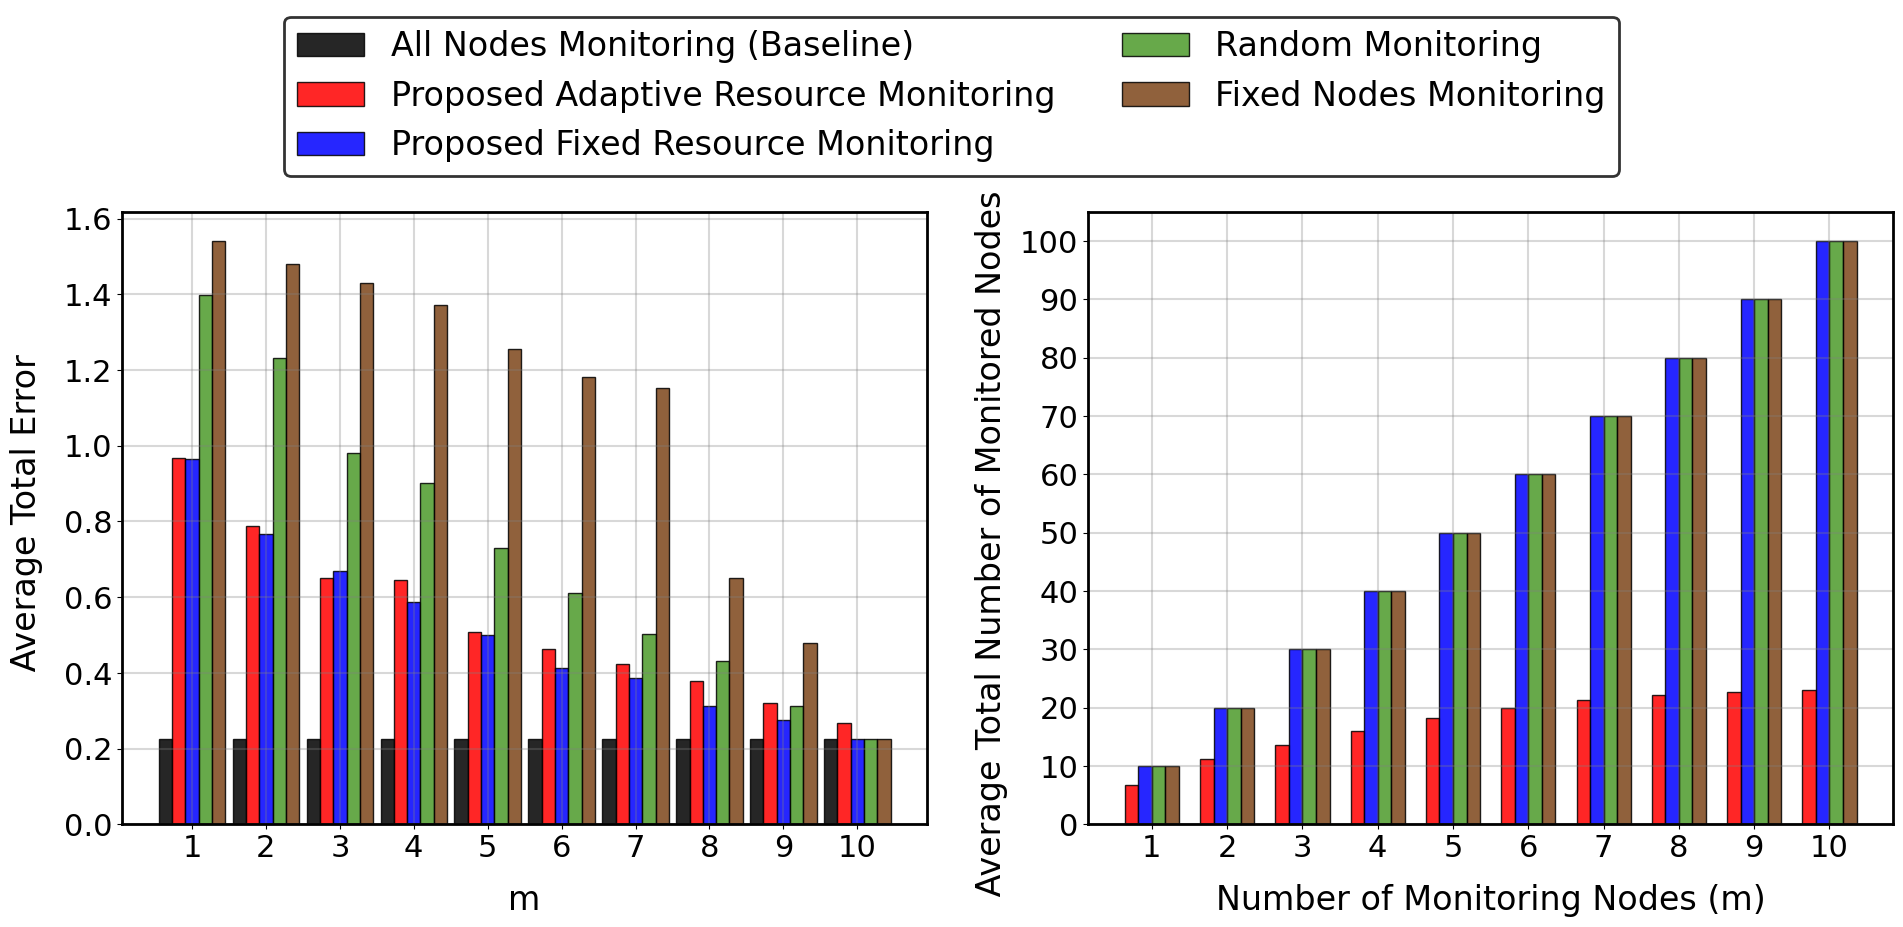

In [ ]:
plt.rcdefaults()
fig, axis = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fontsize = 24

mean_of_mean = np.zeros(m)
num_ours = np.zeros(m)
l = len(modes)/2
j=0
for mode in modes:
  mean_of_mean = np.zeros(N)
  i=0
  for pack in packed_for_m:
    i += 1
    (fixed, ours, random, alll, random_fixed, threshold) = pack
    all_tot_err_list, mode_label, mode_color= mode_handler(mode, 2)
    mean_tot_err_list = np.zeros(T)
    for num in range(0, max_num):
      mean_tot_err_list += all_tot_err_list[num]
    mean_of_mean[i-1] = np.sum(mean_tot_err_list)/(T  * max_num)

    width = 0.18
  j += 1
  rects2 = axis[0].bar(np.arange(N) + (-width*l + (j)*width - width/2), mean_of_mean, width ,label=mode_label,color=mode_color, alpha=0.85, edgecolor="black")
axis[0].set_xticks(np.arange(N))
axis[0].yaxis.set_tick_params(labelsize=fontsize-1)
axis[0].set_xticklabels(np.arange(N)+1, fontsize=fontsize-1)
axis[0].set_ylabel(r' Average Total Error', fontsize=fontsize, labelpad=15)
axis[0].set_xlabel(r'm', fontsize=fontsize, labelpad=15)
axis[0].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
#####################################################################
mean_of_mean = np.zeros(m)
l = (len(modes)-1)/2
j=0
for mode in modes:
  if mode == 'all':
    continue
  i=0
  num = np.zeros(N)
  for pack in packed_for_m:
    mean_of_mean = np.zeros(m)
    i += 1
    (fixed, ours, random, alll, random_fixed, threshold) = pack
    all_mon_list, mode_label, mode_color= mode_handler(mode, 4)
    for arr in all_mon_list:
      for arr2 in arr:
        num[i-1] += len(arr2)
  num = num/(max_num)
  width = 0.18
  j += 1
  rects2 = axis[1].bar(np.arange(N) + (-width*l + (j)*width - width/2 ), num, width ,label=mode_label,color=mode_color, alpha=0.85, edgecolor="black")
axis[1].set_xticks(np.arange(N))
axis[1].set_yticks(np.arange(N+1)*T)
axis[1].yaxis.set_tick_params(labelsize=fontsize-1)
axis[1].set_xticklabels(np.arange(N)+1, fontsize=fontsize-1)
axis[1].set_ylabel(r' Average Total Number of Monitored Nodes', fontsize=fontsize, labelpad=15)
axis[1].set_xlabel(r'Number of Monitoring Nodes (m)', fontsize=fontsize, labelpad=15)
axis[1].grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)

[x.set_linewidth(2) for x in axis[0].spines.values()]
[x.set_linewidth(2) for x in axis[1].spines.values()]
############
# fig.text(0.5, 0.04, 'Number of Reimaged Nodes per Step', ha='center', fontsize=fontsize+1)
plt.setp(axis[0].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[0].get_yticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_yticklabels(), fontsize=fontsize-2)
axis[1].yaxis.set_label_coords(-0.1,0.45)

fig.set_size_inches(23, 9.5)
handles, labels = axis[0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.77
                    , wspace=0.2, hspace=0.05)
plt.show()


